<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#aec101"> Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#aec101">Case study 1 
    <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#b53f05"> (Titanic Data Set)


### Problem Feature:
The sinking of the Titanic is one of the most infamous shipwrecks in history. **On April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing **1502 out of 2224** passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

1.  **Age** ==>> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. **Sibsp** ==>> The dataset defines family relations in this way...

    a. Sibling = brother, sister, stepbrother, stepsister

    b. Spouse = husband, wife (mistresses and fiancés were ignored)

3. **Parch** ==>> The dataset defines family relations in this way...

    a. Parent = mother, father

    b. Child = daughter, son, stepdaughter, stepson

    c. Some children travelled only with a nanny, therefore parch=0 for them.

4. **Pclass** ==>> A proxy for socio-economic status (SES)

    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
    
5. **Embarked** ==>> nominal datatype 
6. **Name** ==>> nominal datatype . It could be used in feature engineering to derive the gender from title
7. **Sex** ==>>  nominal datatype 
8. **Ticket** ==>> that have no impact on the outcome variable. Thus, they will be excluded from analysis
9. **Cabin** ==>>  is a nominal datatype that can be used in feature engineering
11. **Fare** ==>>  Indicating the fare
12. **PassengerID ** ==>> have no impact on the outcome variable. Thus, it will be excluded from analysis
11. **Survival** is ==>> **[dependent variable], 0 or 1



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.1 Loading the libraries

In [95]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.2 import the dataset ?

In [96]:
data=pd.read_csv('train.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.3 How to see the size of your data?

In [97]:
print("Train: rows:{} columns:{}".format(data.shape[0], data.shape[1]))

Train: rows:891 columns:12


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.4 How to view the statistical characteristics of the data?

In [98]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The minimum/maxim values for pclass, age, sibsp, parch show us the range of these features. Also we see that there's quite a range in fares.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.5 How to see just one column.describe()?

In [99]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.6 How to check the column names?

In [100]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.7 Check the Numerical Features,Categorical Features, Alphanumeric Features?

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


    * Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
    * Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
    * Alphanumeric Features: Ticket, Cabin

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.8 Categorical vs. Quantitative

    * Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
    * Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)       

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.8a) Create bar plot for showing Sex Vs Survived. And your Observation?

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


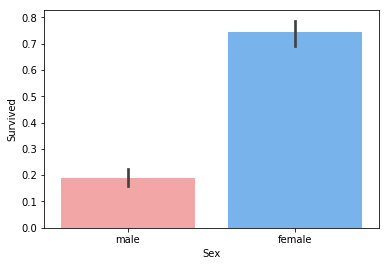

In [102]:
pal = {'male':"#ff9999", 'female':"#66b3ff"}
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=data,palette = pal)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observation:

1. This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. 
2. This bar plot shows that ~74% female passenger survived while only ~18% male passenger survived.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">1.8d) Create a bar plot Pclass Vs Survived.And your Observation?

Percentage of 1st class who survived: 62.96296296296296
Percentage of 2nd class who survived: 47.28260869565217
Percentage of 3rd class who survived: 24.236252545824847


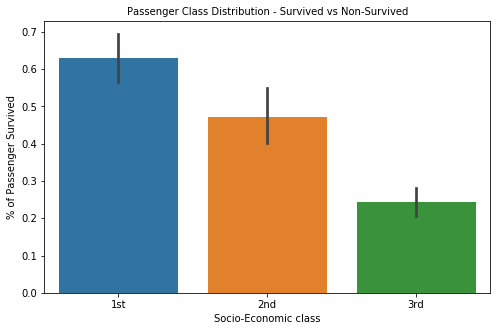

In [103]:
# Create subplot
plt.subplots(figsize = (8,5))
sns.barplot(x = "Pclass", y = "Survived", data=data, linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 10)
plt.xlabel("Socio-Economic class", fontsize = 10);
plt.ylabel("% of Passenger Survived", fontsize = 10);
labels = ['1st', '2nd', '3rd']
val = [0,1,2] 
plt.xticks(val, labels);


#print percentages of 1st vs. 2nd and 3rd class
print("Percentage of 1st class who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of 2nd class who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of 3rd class who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observation:

1. 62% first class passenger survived titanic tragedy, while
2. 47% second class and
3. only 24% third class passenger survived.

The rich people would mostly be staying in the upper decks of the ship, which would have been easier for evacuation.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.8c) Create Bar plot for checking the both Survived vs Sex and Sex:Survived or Not. And your Observations?

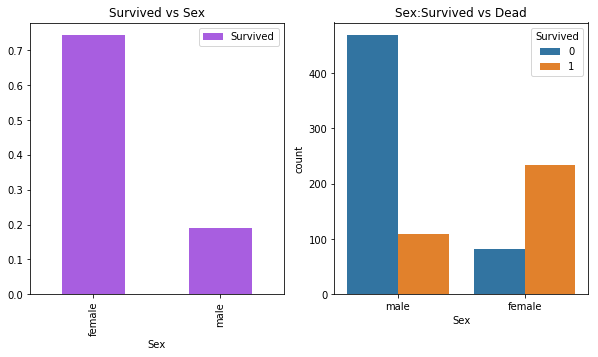

In [104]:
#create a subplot
f,ax=plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(color=['#a85ee0'],ax=ax[0])
ax[0].set_title('Survived vs Sex')

# create count plot
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101">  Observation:
    1. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved.
    2. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  1.8d) Create Bar plot for checking the following:
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  Number Of Passengers By Pclass & 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  Pclass:Survived vs Dead. 

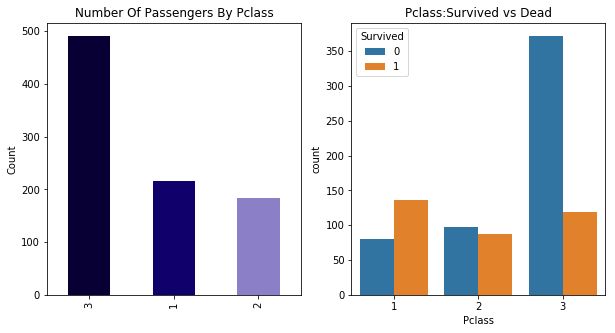

In [105]:
# create subplot plot
f,ax=plt.subplots(1,2,figsize=(10,5))

# create bar plot using groupby
data['Pclass'].value_counts().plot.bar(color=['#080035','#0F006B','#8B80C7'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# create count plot
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101">  Observation:

1. The Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  1.8e) Create violinplot plot for checking 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">    a) Pclass vs. Age sliced by Survived 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">    b) Sex vs Age sliced by Survived. And your Observations?

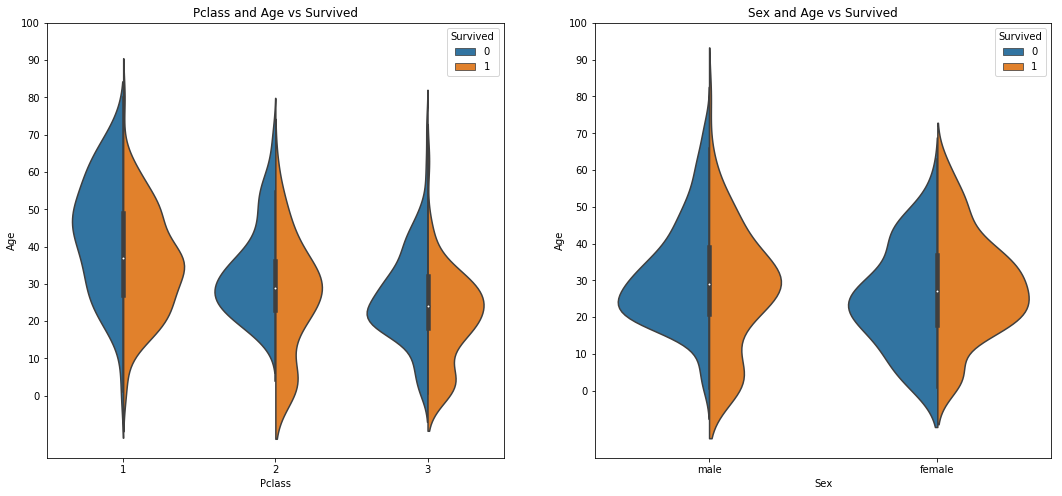

In [106]:
# create subplot plot

f,ax=plt.subplots(1,2,figsize=(18,8))

# create violinplot plot using groupby

sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations:
    
     1.The No.of children increases with Pclass and the survival rate for passenegers below Age10(i.e children)decreases.
     2.Survival chances for Passenegers aged 20-50 from Pclass1 is high.
     3.For males, the survival chances decreases with an increase in age.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.8f) Create Bar(count) plot for checking the Embarked vs (No. of passengers, sex, Survived , Pclass). And your Observations?

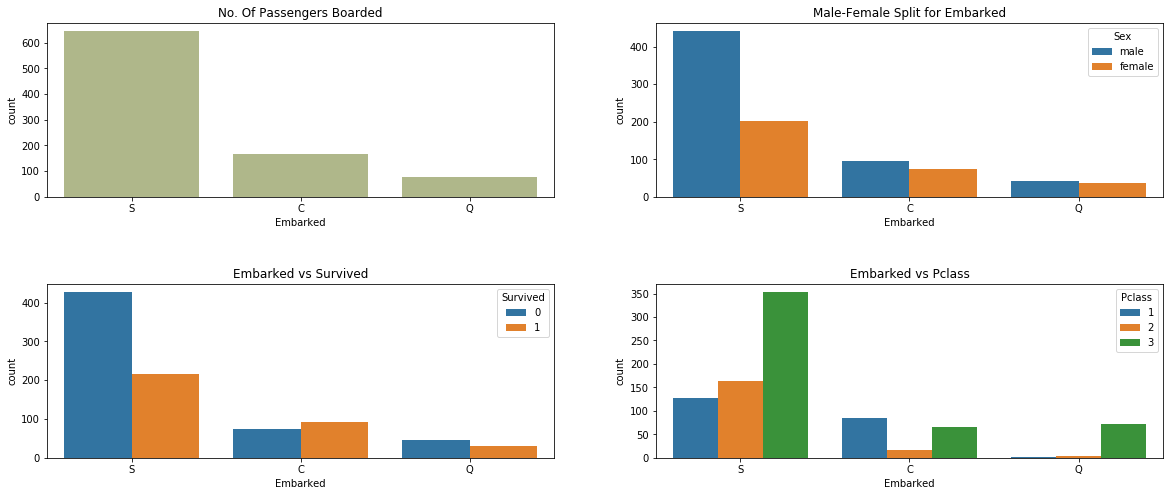

In [117]:
# create subplot plot
f,ax=plt.subplots(2,2,figsize=(20,8))

# create Bar (count) plot for Embarked vs. No. Of Passengers Boarded
sns.countplot('Embarked',data=data,ax=ax[0,0],color="#b4bf82")
ax[0,0].set_title('No. Of Passengers Boarded')

# create Bar (count) plot for Embarked vs. Male-Female Split
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# create Bar (count) plot for Embarked vs Survived
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# create Bar (count) plot for Embarked vs Pclass
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations:

    1. Maximum passenegers boarded from S. Majority of them being from Pclass3.
    2. Port Q had almost 95% of the passengers were from Pclass3.

### Box Plot
A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">1.8 g)Create a box plot for pclass vs Age. And your Observations?

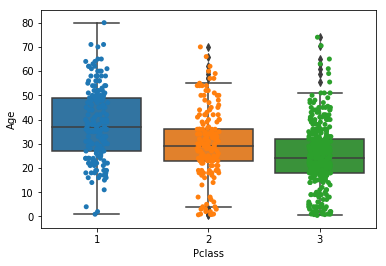

In [108]:
ax= sns.boxplot(x="Pclass", y="Age", data=data)
ax= sns.stripplot(x="Pclass", y="Age", data=data, jitter=True, edgecolor="gray")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations: 
    1. Average age goes down from class 1 to class 3.
    2. We can also see Outliers

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.9 Categorical vs. Categorical

* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.9a) Create a Stacked bar chart Sex Vs Survived. And your Observations?

Survived    0    1
Sex               
female     81  233
male      468  109


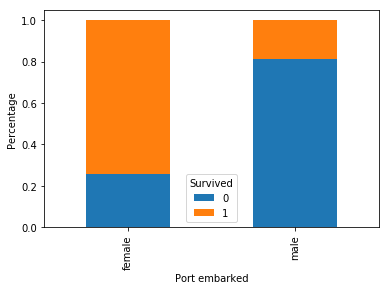

In [109]:
#create crosstab
tab = pd.crosstab(data['Sex'], data['Survived'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101"> Observations:
    1. The chart showing very different Female die more compare to male
    2. But Male are high count in compare to Female.
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101"> 1.10 Quantitative vs. Quantitative

    Numerical Features: Age (Continuous), Fare (Continuous)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">  1.10a) Create a scatter plot for showing age & fare with target varialble. And your Observations?¶

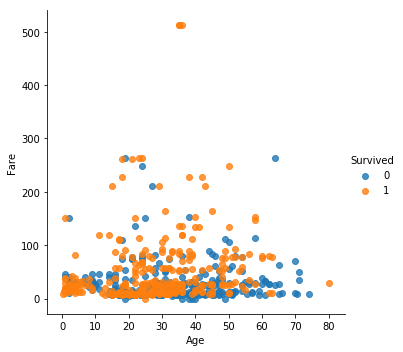

In [110]:
import seaborn as sns

sns.lmplot(x='Age', y='Fare', hue='Survived', 
           data=data.loc[data['Survived'].isin([1,0])], 
           fit_reg=False)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#aec101"> Observation:
    1. Scatter plot showing some relation but not very useful in this case.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.11 Frequency tables 

1. One-Way Tables
2. Two-Way Tables

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101"> 1.11 a) Create frequency tables (also known as crosstabs) in pandas using the pd.crosstab() function. 

In [111]:
One_Way_Tables = pd.crosstab(index=data["Survived"],  # Make a crosstab
                     columns="count")                  # Name the count column

One_Way_Tables

col_0,count
Survived,
0,549
1,342


#### Two-Way Tables

Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#aec101">1.11b )Create Two-way-table for survival vs sex?

In [112]:

survived_sex = pd.crosstab(index=data["Survived"], 
                           columns=data["Sex"])

survived_sex.index= ["died","survived"]

survived_sex

Sex,female,male
died,81,468
survived,233,109


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.12 Check Correlation plot using Headtmap?

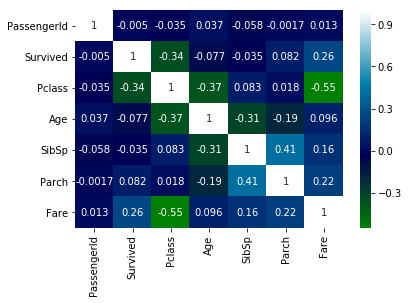

In [57]:
g = sns.heatmap(data.corr(),cmap="ocean",annot=True)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#aec101"> Observation:

1.Fare feature seems to have a significative correlation with the survival probability.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.12 a) Check the pairplot?

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


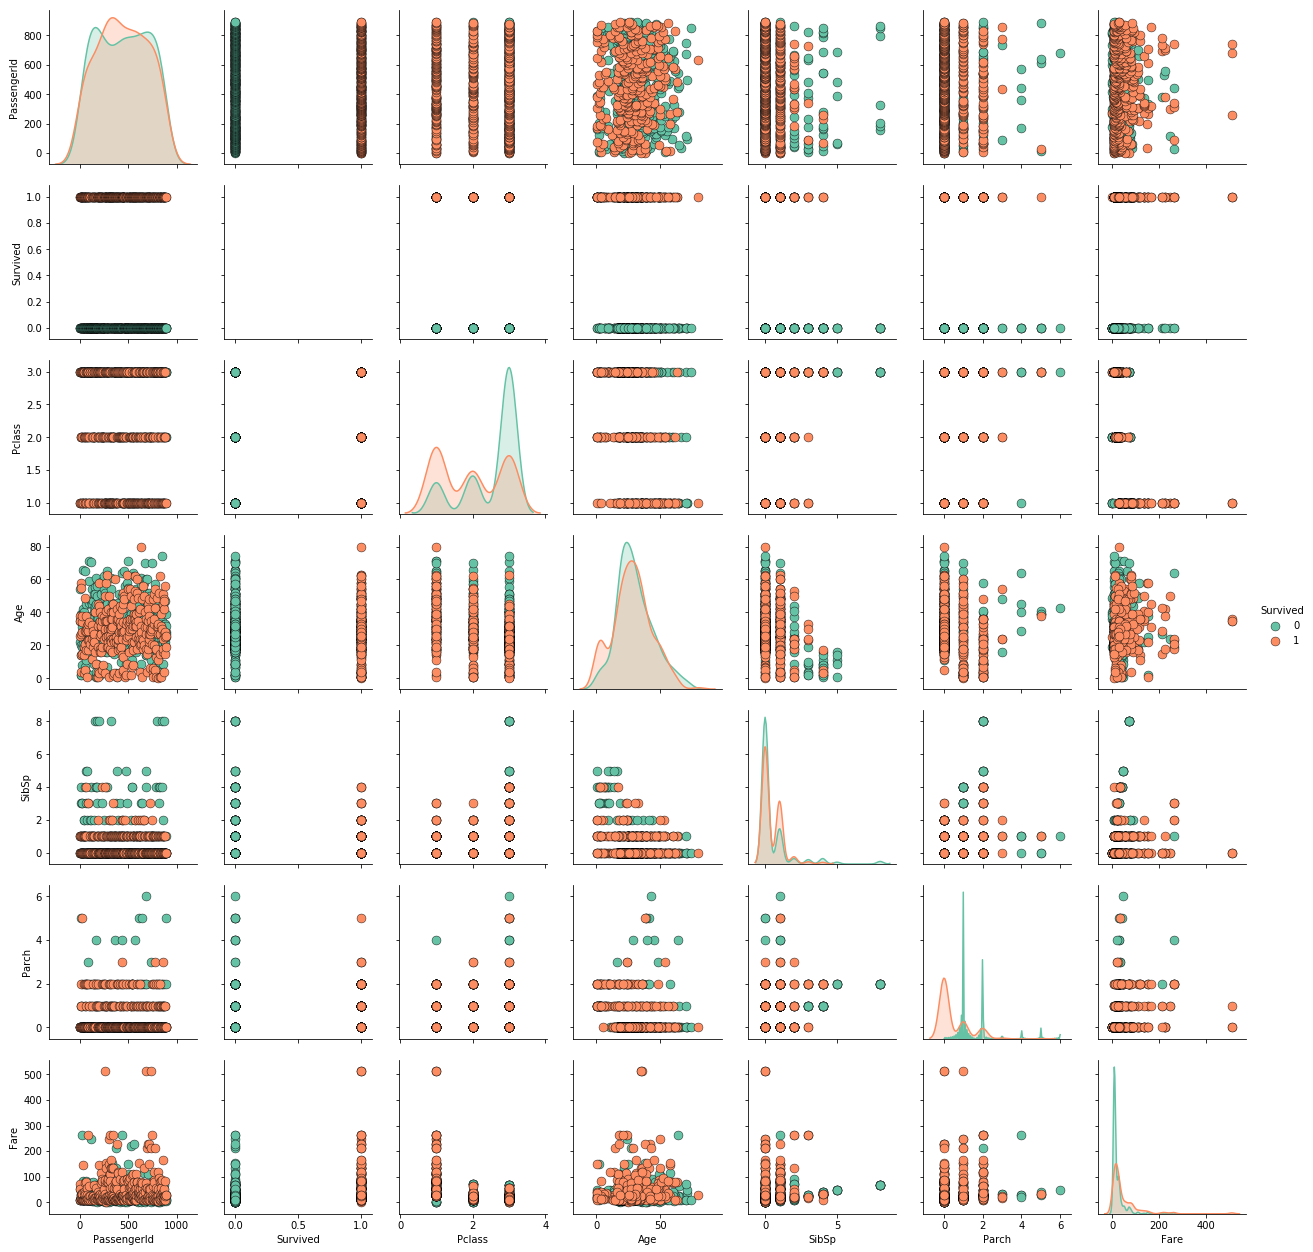

In [58]:
sns.pairplot(data, kind="scatter", hue="Survived", palette="Set2",plot_kws=dict(s=80, edgecolor="black", linewidth=0.4))
plt.show()


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#aec101"> Observation:
    
   1. We can clear see in correlation in dataset.
   2. Age have correlation with fare.
   3. Rest of all No correlation with each other.
   

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#aec101">1.13 Read the AirPassengers dataset and plot the Seasonality.And your observations?

In [89]:
data = pd.read_csv('AirPassengers.csv')
#Parse strings to datetime type
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True) 
#convert from string to datetime
data = data.set_index(['Month'])

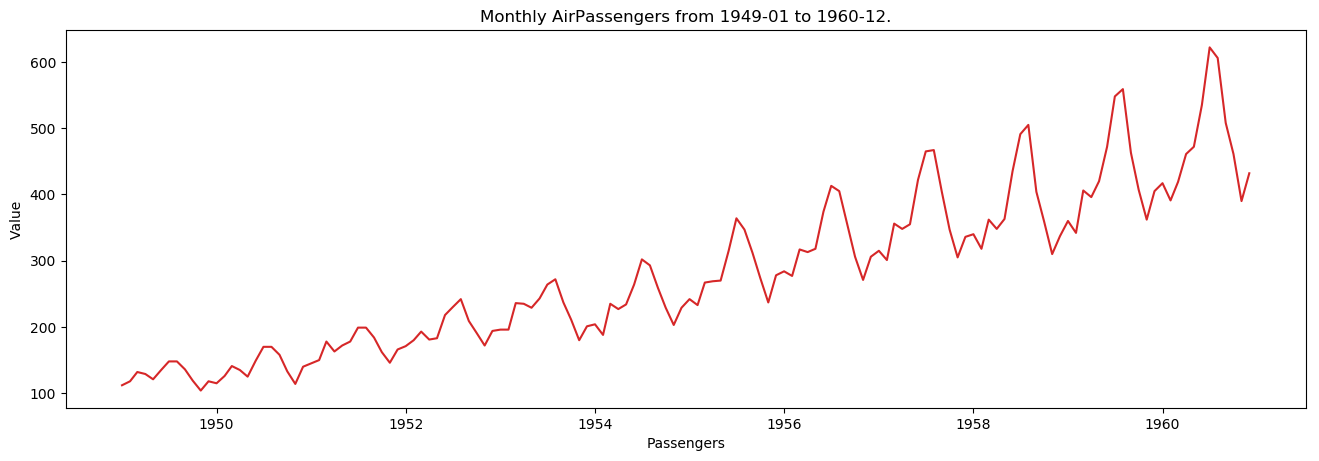

In [92]:
def plot_df(data, x, y, title="", xlabel='Passengers', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data['#Passengers'], title='Monthly AirPassengers from 1949-01 to 1960-12.')    

<span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#aec101">Observations:
    1. The plot we can see seasonality.
    2. Seasonality for count of Passengers is increasing